In [17]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [18]:
mdls = ['mip', 'cp']
res_ = []
for mdl in mdls:
     with open("./results/results_{}_unrestricted.json".format(mdl), "r") as f:
        raw = json.load(f)
        raw = pd.DataFrame(raw)
        raw['mdl_name'] = mdl
        raw['PARAMS'] = raw['NUM_COLORS'].map(str) + ',' + raw['NUM_ITEMS'].map(str) + ','  + raw['BIN_SIZE'].map(str) + ','  + raw['DISCREPANCY'].map(str)
#         raw = raw.set_index('PARAMS')
        res_.append(raw)
         
res = pd.concat(res_)
res['STATUS'] = res['STATUS'].str.lower()


In [19]:
mdl

'cp'

In [20]:
res_across = pd.concat(res_,
    axis=1,
    join="outer",
    names=['mip','cp'])

In [21]:
# res = res[res['NUM_COLORS'] >= 16]
# res = res[res['NUM_ITEMS'] >= 16]
# res = res[res['BIN_SIZE'] >= 16]




In [22]:
res['DISCREPANCY'].unique()

array([0.  , 0.25, 0.75, 0.5 ])

In [23]:
p_mip = res[res['mdl_name'] == 'mip'][['PARAMS','OBJ_VAL', 'STATUS']]
p_cp = res[res['mdl_name'] == 'cp'][['PARAMS','OBJ_VAL', 'STATUS']]

p = pd.merge(p_mip, p_cp, on='PARAMS')
p

,PARAMS,OBJ_VAL_x,STATUS_x,OBJ_VAL_y,STATUS_y
0,"4,8,8,0.0",4.0,integer optimal solution,4.0,optimal
1,"8,8,8,0.25",3.0,integer optimal solution,3.0,optimal
2,"8,8,8,0.75",2.0,integer optimal solution,2.0,optimal
3,"8,8,16,0.0",4.0,integer optimal solution,4.0,optimal
4,"4,16,16,0.25",5.0,integer optimal solution,5.0,optimal
5,"8,8,16,0.5",3.0,integer optimal solution,3.0,optimal
6,"4,16,16,0.75",3.0,integer optimal solution,3.0,optimal


In [24]:
len(p_mip) == len(p_cp)
print(len(p_mip))
print(len(p_cp))

11
34


0 mip
1 cp


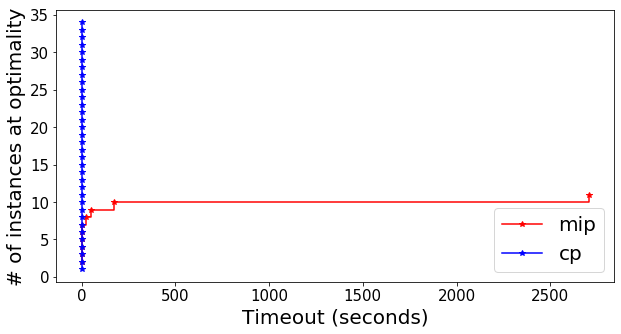

In [25]:
gph = plt.figure(figsize=(10,5))
params = list(res['PARAMS'].unique())
num_instances_feas = [5*i for i in range(1,5)]

colors = ['r','b','g']

for i, mdl_name in enumerate(res.mdl_name.unique()):
    print(i, mdl_name)
    
    res_mdl = res[res['mdl_name'] == mdl_name]
    res_mdl = res_mdl[res_mdl['STATUS'].str.contains("optimal")]
    res_mdl = res_mdl.sort_values(['SOLVE_TIME'])
    solve_times = res_mdl['SOLVE_TIME'].unique()
    counts = []
    for t in solve_times:
        counts.append(res_mdl[res_mdl['SOLVE_TIME'] <= t].shape[0])
    
    plt.step(list(solve_times), counts, "{}*-".format(colors[i]), where='post')
    
plt.legend(res.mdl_name.unique(), loc='lower right', fontsize= 20)
plt.xlabel("Timeout (seconds)", fontsize= 20)
plt.ylabel("# of instances at optimality", fontsize= 20)
# gph.plot(res.groupby(["mdl_name", "timeout"]['obj'].count()), DF0.x, DF0.y, "r.--")
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

In [8]:
solve_times

array([ 0.04799628,  0.06201077,  0.06249595,  0.06249714,  0.07199645,
        0.07800198,  0.0792973 ,  0.10936761,  0.10937262,  0.1239996 ,
        0.13299847,  0.14062548,  0.17307186,  0.20999837,  0.28124928,
        0.36300182,  0.37400031,  0.41400599,  0.62699389,  0.64474559,
        0.7845366 ,  1.03599691,  1.15045214,  1.53502607,  1.91000271,
        2.40613508,  2.56356549,  3.12959623,  6.82640123, 11.71409559,
       12.3243916 , 18.22964835])